## Time Series with Pandas
- 시계열 데이터는 시간 데이터를 인덱스로 하는 연속된 데이터
- 시간 데이터를 Python의 DateTime 타입으로 바꾸어 Pandas가 제공하는 시계열 데이터 처리하는 몇가지 기능들을 이용하여 처리

### (1) DateTime 인덱스
### (2) Time Resampling 
    - 시나 분 등 작은 단위 DateTime 인덱스로 이루어진 경우, 더 넓은 주기로 데이터를 집계(aggregate) 해야 하는 경우 Time Resampling 이 필요
    - 일반적으로 groupby를 사용함으로써 TimeResampling을 수행할 수는 있지만 분기나 회계년도를 편리하게 처리할 방법은 되지 못함
    - pandas에서 frequency sampling 도구를 지원.
    
### (3) Time Shifts 
    - 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이동시켜야 할 경우. Pandas에서 쉬운 방법을 제공
    
### (4) Rolling and Expanding 
    - 매일 수집한 데이터들에는 노이즈가 포함됨
    - 데이터의 일반적인 트렌드를 구하기 위해 rolling mean (또는 moving avrage) 를 사용
    - Pandas에 내장된 rolling 함수를 이용하여 주어진 시한 내 평균 (rolling mean) 등을 구함
    - 임의 시간 간격의 WIndow를 만들고 그 안에서 mean 같은 통계적 aggregation 을 실행

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (1) Time Indexing
from datetime import datetime

# 년월일 지정
today = datetime(2020, 10, 24)
print(today)
print(today.year, today.month, today.day)

# 년월일 시분초
today2 = datetime(2020, 10, 24, 15, 13, 39)
print(today2)
print(today2.hour, today2.minute, today2.second)


2020-10-24 00:00:00
2020 10 24
2020-10-24 15:13:39
15 13 39


In [14]:
# datetime 객체로 list 생성 예시
dates = [datetime(2019,1,23), datetime(2019,1,24), datetime(2019,1,25), datetime(2019,1,26)]

# DatetimeIndex 로 대체
dt_index = pd.DatetimeIndex(dates)
print(dt_index, type(dt_index))

# 랜덤 데이터 생성 및 인덱스와 함께 DataFrame 만들기
data = np.random.randn(4,2)
cols = ['A','B']
df = pd.DataFrame(data = data, index = dt_index, columns = cols)
# df = pd.DataFrame(data = data, index = dt_index, columns = cols).reset_index() # 하면 datetime 없어짐

df

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26'], dtype='datetime64[ns]', freq=None) <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,A,B
2019-01-23,-0.056445,-0.209082
2019-01-24,-0.143291,0.541846
2019-01-25,1.145775,-0.932532
2019-01-26,0.782345,-0.011289


In [78]:
# to_datetime 대신 Parse_dates = True 옵션
pd.read_csv('tsa_data/apple_stock.csv', index_col='Date', parse_dates = True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [18]:
### 팁 - 일상적으로 쓰는 argmax(), argmin() 등 은 dataframe 에서 index 로 작업이 가능.
print(df.index.argmin(), df.index.argmax())
print(df.index.min(), df.index.max())

df = pd

0 3
2019-01-23 00:00:00 2019-01-26 00:00:00


In [32]:
## (2) Resampling
df = pd.read_csv('tsa_data/apple_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [33]:
# apply(to_dataframe)
df['Date'] = df['Date'].apply(pd.to_datetime)
print(df.dtypes)

df.set_index('Date', inplace=True)
df.head()

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [34]:
# single aggregation - month에 대해서
df['month'] = df.index.month
df.groupby('month').agg(sum)

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [35]:
# multi aggregation - year & month
df.groupby([df.index.year, df.index.month]).agg(sum)


High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
...                ...          ...          ...          ...           ...   
2018 8     4934.909988  4860.029999  4883.340012  4906.960037  7.002737e+08   
     9     4266.080002  4181.480011  4224.290009  4219.400024  6.789720e+08   
     10    5150.640030  5011.109985  5087.600021  5079.449997  7.897485e+08   
     11    4072.939987  3962.709976  4028.209991  4015.949997  9.613264e+08   
     12    3179.080017  3075.930023  3139.619995  3121.060028  8.989225e+08   

             Adj Close  month  
Date Date                      
2009 12      20.159719     12  
2010 1      377.554930     19  
     2      361.342400     38  
     3      491.575537     69  
     4      504.554579     84  
...                ...    ...  
2018 8     4884.851288    184  
     9     4204.729004    171  
     10    5061.788559    230  
     11    4012.316437    231  
     12    3121.060028    228  

[109 rows x 7 columns]

## Resampling
- 기존 group by 보다 훨씬 좋음
- 시간 인덱스를 기준으로 resampling 하는 것입니다. 그러기 위해 resample 메서드를 사용합니다.
- **resample** 호출 시 rule 파라메터를 입력해야 하는데, 입력한 rule 단위로 resampling 하게 됩니다. resampling 되어 리턴된 객체의 row 를 재조합하기 위해 aggregation 함수 (mean, sum, count, etc) 따위를 실행해서 결과를 도출합니다.

- DataFrame.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)[source]¶
- kind (timestamp, period,

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [42]:
# Yearly Means
# A or Y = 연도별로 합계 => A는 Anuuarly
df.resample(rule = 'A').sum() 

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010-12-31,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011-12-31,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012-12-31,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013-12-31,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014-12-31,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015-12-31,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016-12-31,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017-12-31,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [45]:
df.resample(rule = 'A').mean()['2010']

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119,6.583333


In [49]:
# 각 해마다의 첫번째 행 값 - 사용자 정의 함수 넣기도 가능  / mean()이나 sum() 대신에 들어감
df.resample(rule='A').apply(lambda x : x[0])

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


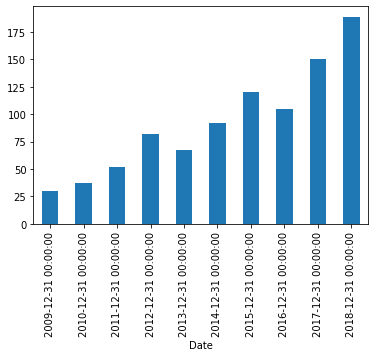

In [51]:
# + 시각화와 결합해보기 plot 으로 바로 그냥 kind 결합
df['Close'].resample('A').mean().plot(kind='bar')

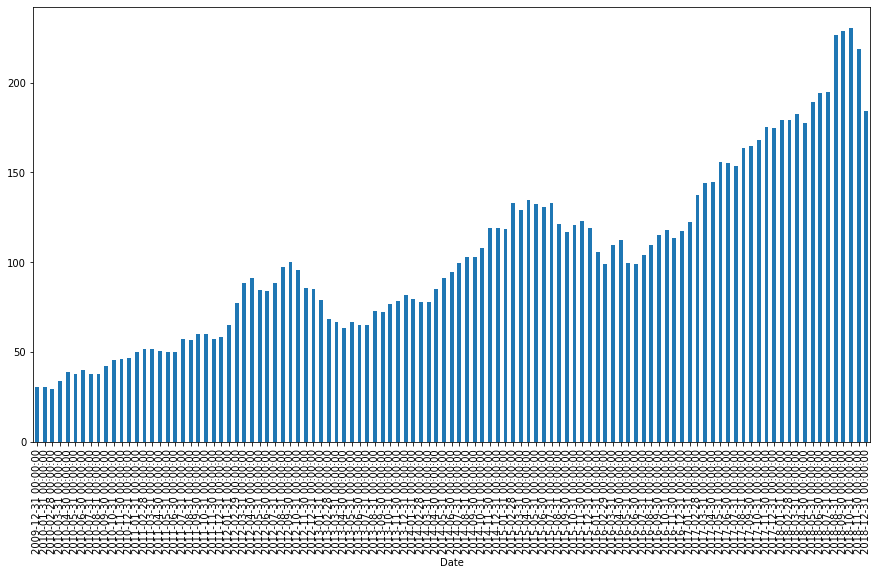

In [53]:
# 오픈가격을 월별로 시각화로 그려봐라
df['Open'].resample('M').max().plot(kind='bar', figsize=(15,8))

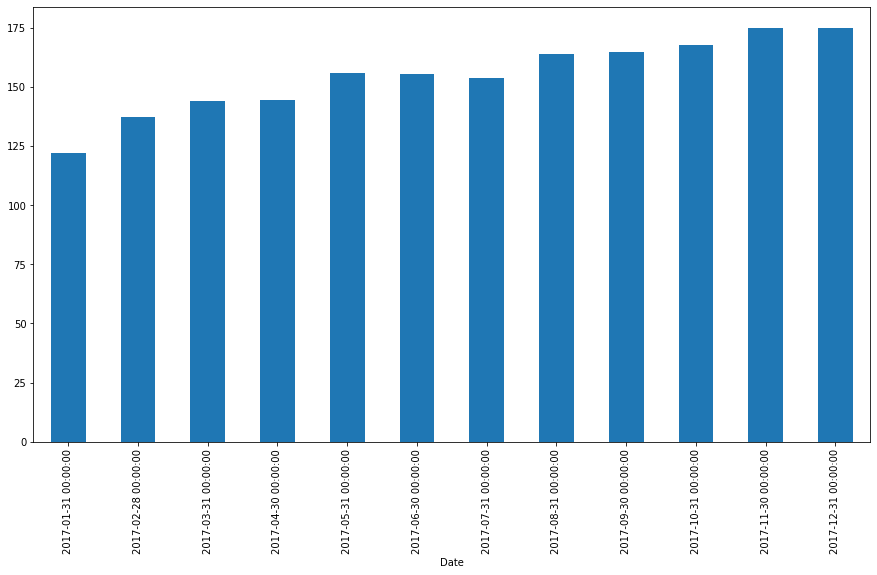

In [54]:
# 오픈가격을 월별로 일정기간 이후것 시각화로 그려봐라
# pandas에서는 특정 문자열을 읽어서 알아서 처리 해주기 떄문에..!
df['Open']['2017'].resample('M').max().plot(kind='bar', figsize=(15,8))

In [56]:
# date_range 중에서 Business 만 사용
daily_daterange = pd.date_range(start=datetime(2018,9,1), 
                                end=datetime(2019,1,24),
                                freq='B') # Business 만 뽑음.

daily_daterange


DatetimeIndex(['2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24'],
              dtype='datetime64[ns]', length=104, freq='B')

In [60]:
# daily 임의 데이터셋 만들기
daily_dataset = pd.DataFrame(data = {'value': np.random.rand(len(daily_daterange))},
                             index = daily_daterange)
daily_dataset.head()

,value
2018-09-03,0.458571
2018-09-04,0.044972
2018-09-05,0.934279
2018-09-06,0.182060
2018-09-07,0.871776


In [64]:
# Weekday를 monday 기준으로 하고 min한것
# W-MON : Weekday 시작을 Monday로 / W-WED : Weekday 시작을 수요일로
daily_dataset.resample('W-MON').min()

,value
2018-09-03,0.458571
2018-09-10,0.044972
2018-09-17,0.283748
2018-09-24,0.230362
2018-10-01,0.150175
2018-10-08,0.350394
2018-10-15,0.424844
2018-10-22,0.350539
2018-10-29,0.158976
2018-11-05,0.001041


In [65]:
# 월별로 가장 최소인값들 
daily_dataset.resample('M').min()

,value
2018-09-30,0.044972
2018-10-31,0.158976
2018-11-30,0.001041
2018-12-31,0.057998
2019-01-31,0.017655


### Shifting
- shifting의 문제점 : 데이터를 잃음

In [68]:
df = pd.read_csv('tsa_data/apple_stock.csv', index_col='Date')
df.index = pd.to_datetime(df.index) # to_datetime 형으로 변환

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [73]:
# ex1 )ndarray로 수동 
temp = np.asarray(df['Close'])
temp[:-1]

array([ 30.10428619,  30.5728569 ,  30.62571335, ..., 157.16999817,
       156.1499939 , 156.22999573])

In [75]:
# ex2) shift -> shift 했다는걸 lagging 이라고 함.
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [76]:
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# 한달에 대해서 shifting / freq를 통해서 단위를 지정해서도 가능
df.tshift(freq='M', periods=1).head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Rolling & Expanding
- 시계열 데이터를 처리하고 분석하는 과정에서 Moving Average 를 구하기 위해 rolling mean 을 자주 사용하게 됩니다. pandas 는 이를 처리하기 위해 편리한 방법을 제공합니다.
- **rolling** 메서드는 일정 시간구간의 윈도우를 row 엔트리로 만들어냅니다.

In [81]:
# to_datetime 대신 Parse_dates = True 옵션
# parse_dates 안에는 True / ['Date'] 혹은 함수도 괜찮음.
pd.read_csv('tsa_data/apple_stock.csv', index_col='Date', parse_dates = True )

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [83]:
# 7개씩 모으는 것.
# 앞에 7일은 당연히 missing이 발생
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


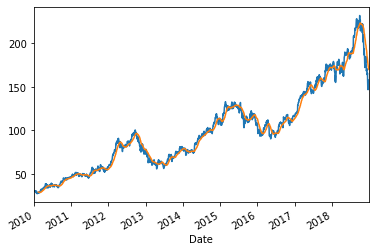

In [86]:
# trend를 이용하는 것. / 30일치의 Close 를 plot
df['Close'].plot()
df.rolling(window=30).mean()['Close'].plot()

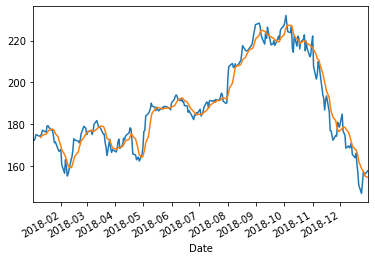

In [89]:
# trend를 이용하는 것. / 근 7일치에 대해서 봄.
df['2018']['Close'].plot() # 일반어떻게 나오나.
df['2018'].rolling(window=7).mean()['Close'].plot() # 7일 정도로 보는 것

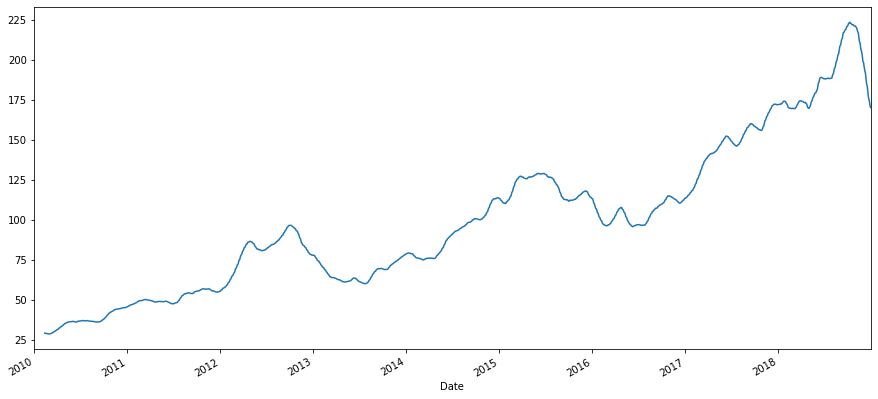

In [92]:
df['Close : 30 Day Mean'] = df['Close'].rolling(30).mean()

df['Close : 30 Day Mean'].plot(figsize=(15,7))

### Expanding
- 시점을 고정해놓고, 처음에는 1개 두번쨰는 2개 그다음은 3개, 4개 이런식으로
- rolling mean 을 시간간격에 국한시키지 않고 시계열 데이터의 시작점부터 넓혀가며 구하려면 **expanding** 메서드를 사용합니다.

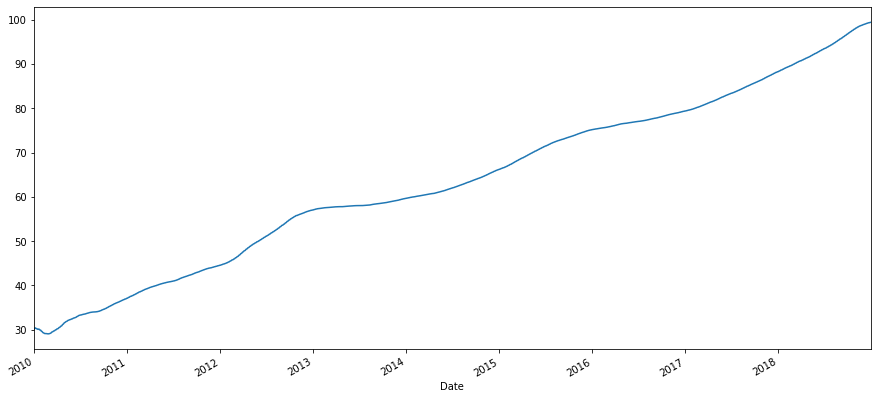

In [94]:
# min_periods : 최소 주기 설정
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7)) # 누적 평균

## Bollinger Bands (주식용어라고함)
- 볼린져 밴드란 moving average (rolling mean) 에서 위아래로 two standard deviation 만큼의 경계를 표시한 챠트 

In [97]:
# 20일 주기의 moving average
df['Close: 20Day Mean'] = df['Close'].rolling(window=20).mean()

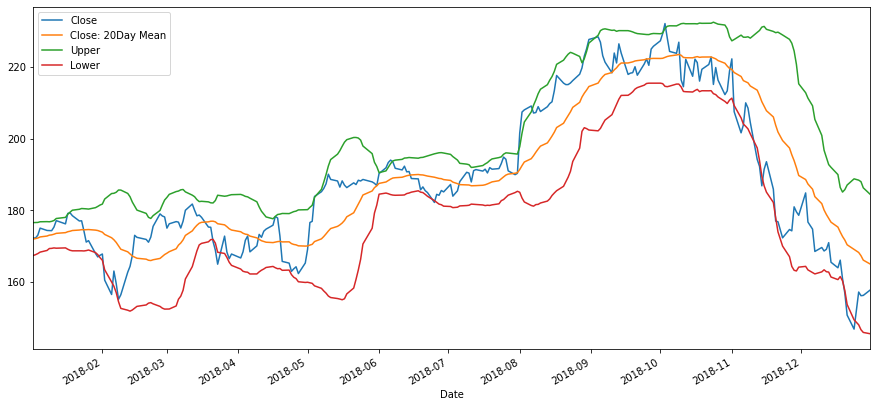

In [100]:
# 2 standard deviation upper
df['Upper'] = df['Close: 20Day Mean'] + 2*df['Close'].rolling(20).std()

# 2 standard deviation lower
df['Lower'] = df['Close: 20Day Mean'] - 2*df['Close'].rolling(20).std()

df['2018':][['Close', 'Close: 20Day Mean', 'Upper', 'Lower']].plot(figsize=(15,7))

## 출처 (T아카데미 시계열 강의)
- https://www.youtube.com/watch?v=oNLaw2Q8Irw&list=PL9mhQYIlKEhd60Qq4r2yC7xYKIhs97FfC 